In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initial_state(N):
    '''Generate a random spin configuration for initial condition.'''
    state = np.random.choice([-1, 1], size=(N, N))
    return state

def triangular_neighbors(i, j, N):
    '''Returns the indices of the six neighbors of (i, j) in a triangular lattice.'''
    neighbors = [((i-1) % N, j), ((i+1) % N, j),  # Top and bottom
                 (i, (j-1) % N), (i, (j+1) % N),  # Left and right
                 ((i-1) % N, (j-1) % N), ((i+1) % N, (j+1) % N)]  # Diagonals
    # Adjust for triangular lattice geometry
    if i % 2 == 0:  # Even rows
        neighbors[-1] = ((i+1) % N, (j-1) % N)  # Adjust last diagonal for even rows
    else:  # Odd rows
        neighbors[-2] = ((i-1) % N, (j+1) % N)  # Adjust second to last diagonal for odd rows
    return neighbors

def mc_move(config, beta, N, H):
    '''Monte Carlo move using Metropolis algorithm for triangular lattice with magnetic field'''
    for _ in range(N*N):
        i = np.random.randint(N)
        j = np.random.randint(N)
        s =  config[i, j]
        nb = sum(config[x, y] for x, y in triangular_neighbors(i, j, N))
        cost = 2*s*nb + 2*H*s  # Include magnetic field in energy cost
        if cost < 0 or np.random.rand() < np.exp(-cost*beta):
            s *= -1
        config[i, j] = s
    return config

def calculate_energy(config, N, H):
    '''Energy of a given configuration for triangular lattice with magnetic field'''
    energy = 0
    for i in range(N):
        for j in range(N):
            S = config[i,j]
            nb = sum(config[x, y] for x, y in triangular_neighbors(i, j, N))
            energy += -nb*S
    energy = energy / 2.  # Each pair counted twice
    magnetic_energy = -H * np.sum(config)  # Energy due to the magnetic field
    return energy + magnetic_energy

def ising_model_triangular(N=10, eq_steps=1000, mc_steps=500, T=2.0, H=0.0):
    '''Main Monte Carlo Simulation for triangular lattice with magnetic field'''
    config = initial_state(N)
    beta = 1.0/T
    
    for _ in range(eq_steps):  # Equilibrate
        mc_move(config, beta, N, H)
    
    for _ in range(mc_steps):
        mc_move(config, beta, N, H)
        
    E = calculate_energy(config, N, H)
    return config, E


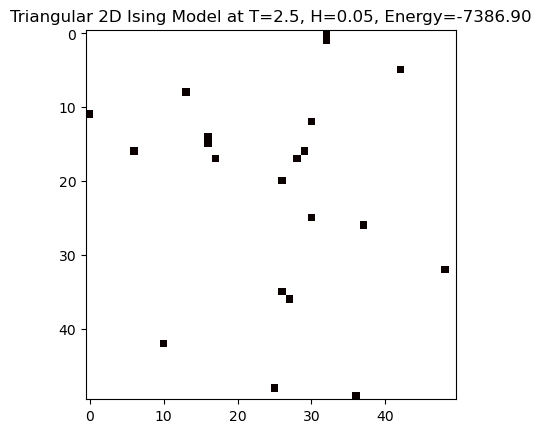

In [4]:
# Simulation Parameters
N = 50  # Lattice size
T = 2.5  # Temperature
H = 0.05   # External magnetic field
config, E = ising_model_triangular(N, eq_steps=1000, mc_steps=500, T=T, H=H)

# Plot the final configuration
plt.imshow(config, cmap='hot', interpolation='nearest')
plt.title(f"Triangular 2D Ising Model at T={T}, H={H}, Energy={E:.2f}")
plt.show()